# Forecasting the amount of a product that customers will purchase taking various factors

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection 
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
data.describe(include='all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


<Axes: xlabel='Sales', ylabel='Count'>

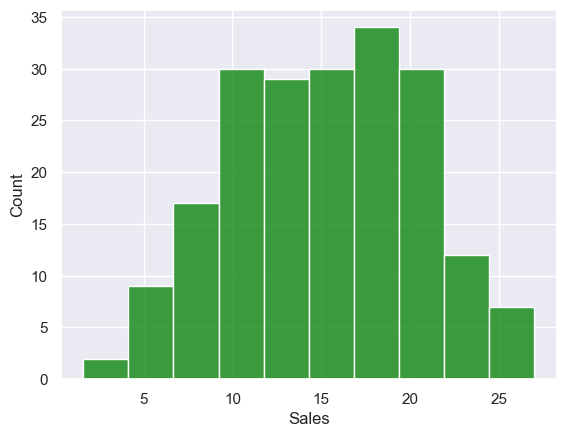

In [6]:
sns.histplot(data['Sales'],color='green')

In [7]:
q=data['Sales'].quantile(0.99)
data1=data[data['Sales']<q]
data1.describe(include='all')

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,145.676768,23.034848,30.288889,15.014646
std,85.194026,14.741083,21.674301,5.181923
min,0.700000,0.000000,0.300000,1.600000
25%,73.725000,9.925000,12.650000,11.000000
50%,148.500000,22.400000,25.600000,15.950000
75%,218.225000,36.175000,44.900000,18.900000
max,296.400000,49.600000,114.000000,25.500000


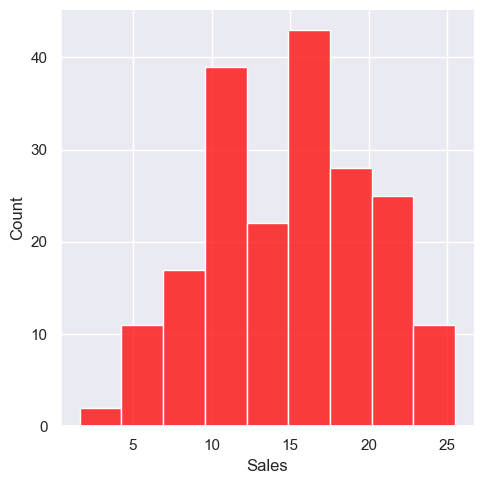

In [8]:
sns.displot(data1['Sales'],color='red')

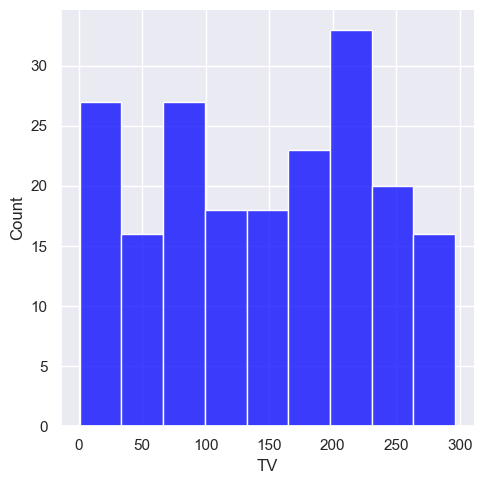

In [9]:
sns.displot(data1['TV'],color='blue')

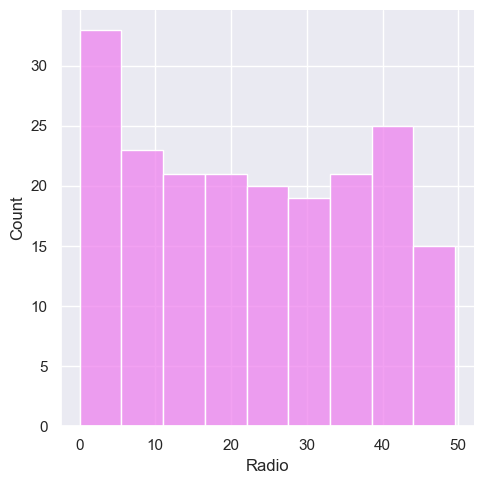

In [10]:
sns.displot(data1['Radio'],color='violet')

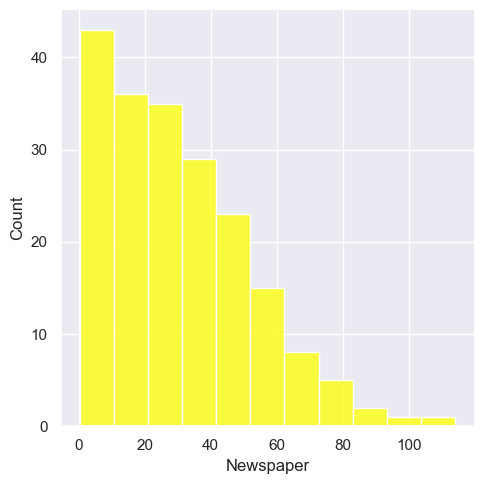

In [11]:
sns.displot(data1['Newspaper'],color='yellow')

Text(0.5, 1.0, 'Newspaper and Sales')

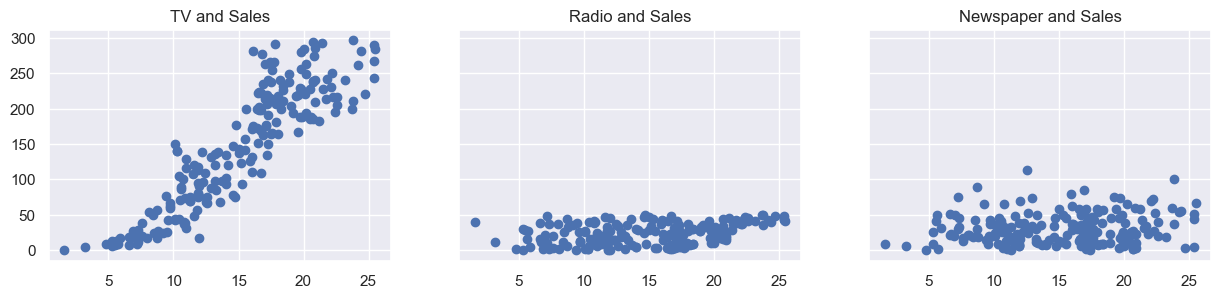

In [12]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data1['Sales'],data1['TV'])
ax1.set_title('TV and Sales')
ax2.scatter(data1['Sales'],data1['Radio'])
ax2.set_title('Radio and Sales')
ax3.scatter(data1['Sales'],data1['Newspaper'])
ax3.set_title('Newspaper and Sales')

In [13]:
log_sale=np.log(data1['Sales'])
data1['log_sale']=log_sale
data1

C:\Users\mkssm\AppData\Local\Temp\ipykernel_18012\775612479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['log_sale']=log_sale


,TV,Radio,Newspaper,Sales,log_sale
0,230.1,37.8,69.2,22.1,3.095578
1,44.5,39.3,45.1,10.4,2.341806
2,17.2,45.9,69.3,12.0,2.484907
3,151.5,41.3,58.5,16.5,2.803360
4,180.8,10.8,58.4,17.9,2.884801
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,2.028148
196,94.2,4.9,8.1,14.0,2.639057
197,177.0,9.3,6.4,14.8,2.694627
198,283.6,42.0,66.2,25.5,3.238678


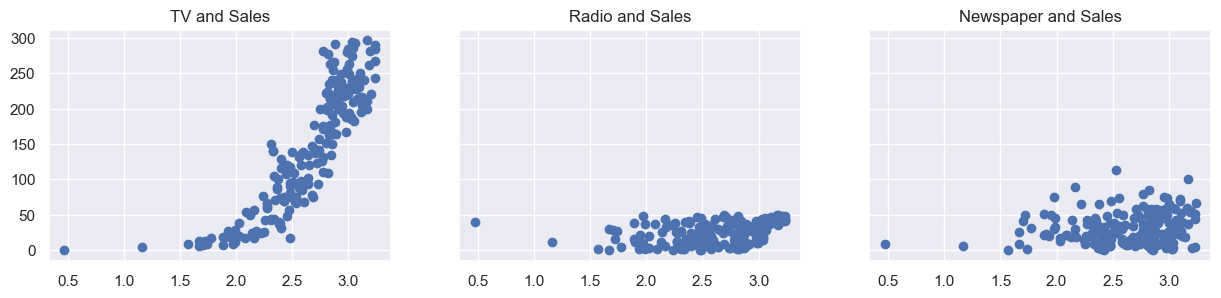

In [14]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data1['log_sale'],data1['TV'])
ax1.set_title('TV and Sales')
ax2.scatter(data1['log_sale'],data1['Radio'])
ax2.set_title('Radio and Sales')
ax3.scatter(data1['log_sale'],data1['Newspaper'])
ax3.set_title('Newspaper and Sales')
plt.show()

In [15]:
data1.columns.values

array(['TV', 'Radio', 'Newspaper', 'Sales', 'log_sale'], dtype=object)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data1[['TV','Radio','Newspaper']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns
vif

,VIF,features
0,2.426336,TV
1,3.213033,Radio
2,2.999510,Newspaper


In [17]:
targets=data1['log_sale']
input=data1.drop(['log_sale'],axis=1)

In [18]:
scaler=StandardScaler()
scaler.fit(input)
input_scaled=scaler.transform(input)

In [19]:
x_train, x_test, y_train, y_test= train_test_split(input_scaled,targets,test_size= 0.2,random_state=365)

In [20]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

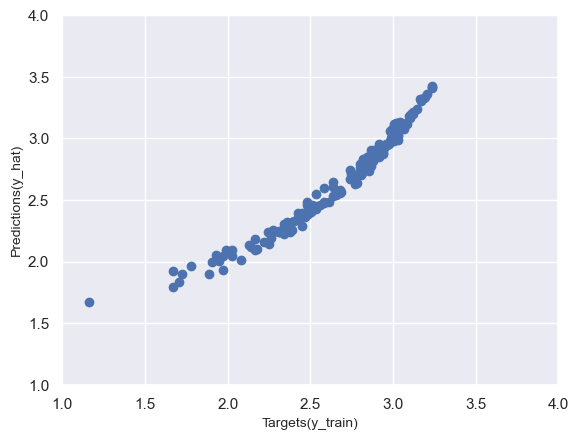

In [21]:
y_hat=reg.predict(x_train)
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(y_train)',size=10)
plt.ylabel('Predictions(y_hat)',size=10)
plt.xlim(1,4)
plt.ylim(1,4)
plt.show()

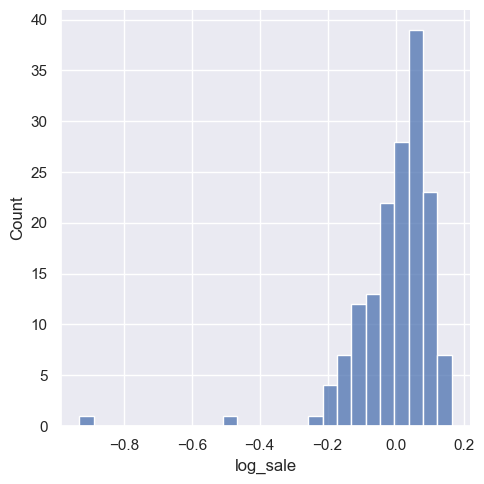

In [22]:
sns.displot(y_train-y_hat)

In [23]:
reg.score(x_train,y_train)

0.9242740658034858

In [24]:
reg.intercept_

2.6295594673455787

In [25]:
reg.coef_

array([-0.08729431, -0.06252284,  0.01196587,  0.49917612])

In [26]:
reg.summary=pd.DataFrame(input.columns.values,columns=['Features'])
reg.summary['Weights']=reg.coef_
reg.summary

,Features,Weights
0,TV,-0.087294
1,Radio,-0.062523
2,Newspaper,0.011966
3,Sales,0.499176


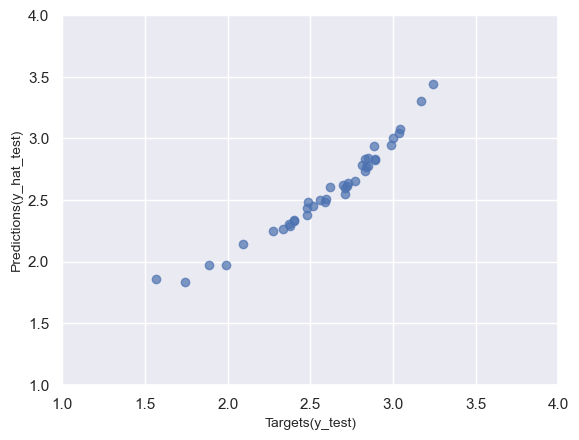

In [27]:
y_hat_test=reg.predict(x_test)
plt.scatter(y_test,y_hat_test,alpha=0.7)
plt.xlabel('Targets(y_test)',size=10)
plt.ylabel('Predictions(y_hat_test)',size=10)
plt.xlim(1,4)
plt.ylim(1,4)
plt.show()

In [28]:
data2=pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
data2.head()

,Prediction
0,10.314594
1,31.178493
2,9.655875
3,12.247834
4,6.282118


In [29]:
data2['Target']=np.exp(y_test)
data2

,Prediction,Target
0,10.314594,NaN
1,31.178493,NaN
2,9.655875,NaN
3,12.247834,NaN
4,6.282118,17.9
5,11.963046,NaN
6,10.801473,NaN
7,9.478490,NaN
8,17.049450,4.8
9,13.760939,NaN


In [30]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0    2.397895
1    3.238678
2    2.332144
3    2.595255
4    1.740466
Name: log_sale, dtype: float64

In [31]:
data2['Target']=np.exp(y_test)
data2

,Prediction,Target
0,10.314594,11.0
1,31.178493,25.5
2,9.655875,10.3
3,12.247834,13.4
4,6.282118,5.7
5,11.963046,13.3
6,10.801473,11.9
7,9.478490,9.7
8,17.049450,18.0
9,13.760939,14.8


In [32]:
data2['Residual']=data2['Target']-data2['Prediction']
data2['Difference%']=np.absolute(data2['Residual']/data2['Target']*100)
data2

,Prediction,Target,Residual,Difference%
0,10.314594,11.0,0.685406,6.230963
1,31.178493,25.5,-5.678493,22.268599
2,9.655875,10.3,0.644125,6.253645
3,12.247834,13.4,1.152166,8.598252
4,6.282118,5.7,-0.582118,10.212604
5,11.963046,13.3,1.336954,10.052288
6,10.801473,11.9,1.098527,9.231318
7,9.478490,9.7,0.221510,2.283612
8,17.049450,18.0,0.950550,5.280832
9,13.760939,14.8,1.039061,7.020686


In [33]:
data2.describe()

,Prediction,Target,Residual,Difference%
count,40.000000,40.000000,40.000000,40.000000
mean,14.093017,14.395000,0.301983,7.339792
std,5.300979,4.739682,1.412043,6.115531
min,6.282118,4.800000,-5.678493,0.305115
25%,10.340736,11.000000,-0.090229,3.636243
50%,13.460598,14.900000,0.667978,6.314090
75%,16.941837,17.300000,1.101085,9.249490
max,31.178493,25.500000,2.158625,33.387608


In [34]:
pd.options.display.max_rows=100
pd.set_option('display.float_format',lambda x:'%.2f'%x)
data2.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
23,12.04,12.00,-0.04,0.31
10,20.18,20.10,-0.08,0.41
37,17.01,16.90,-0.11,0.68
15,13.53,13.70,0.17,1.24
21,17.08,17.30,0.22,1.29
16,21.08,20.80,-0.28,1.32
24,7.18,7.30,0.12,1.63
7,9.48,9.70,0.22,2.28
34,16.15,16.60,0.45,2.72
18,19.08,19.80,0.72,3.62
